## Airline Passenger Dataset

In [373]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
!pip install tensorflow

In [375]:
data = pd.read_csv('airline-passengers.csv')
print(data.columns)
print(data.head())

Index(['month', 'total_passengers'], dtype='object')
     month  total_passengers
0  1949-01               112
1  1949-02               118
2  1949-03               132
3  1949-04               129
4  1949-05               121


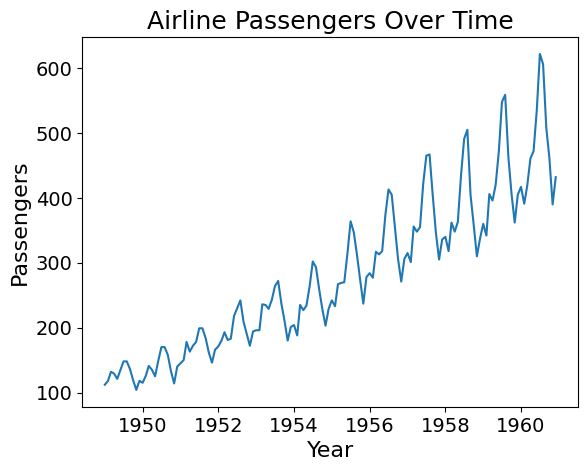

In [377]:
# Load dataset
data = pd.read_csv('airline-passengers.csv', parse_dates=['month'], index_col='month')
data = data['total_passengers']

# Plot the data
plt.plot(data)
plt.title('Airline Passengers Over Time', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Passengers', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig("Airline Passengers Over Time.png", bbox_inches = "tight", dpi = 400)

## ARIMA

1961-01-01    439.854851
1961-02-01    465.296541
1961-03-01    500.666053
1961-04-01    535.971386
1961-05-01    561.689032
1961-06-01    571.312539
1961-07-01    562.971914
1961-08-01    539.728844
1961-09-01    508.527884
1961-10-01    478.147288
1961-11-01    456.747584
1961-12-01    449.697514
Freq: MS, Name: predicted_mean, dtype: float64


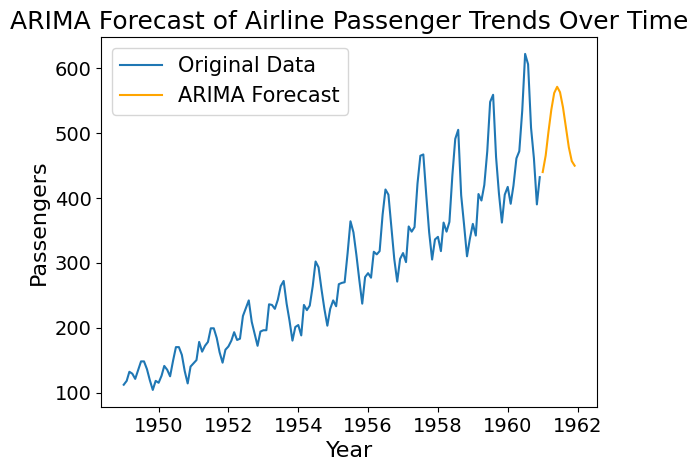

In [379]:
# Fit ARIMA model with p = 2, d = 1, q = 2
model_arima = ARIMA(data, order=(2, 1, 2))  
arima_result = model_arima.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=12)
print(forecast_arima)

# Plot forecast
plt.plot(data, label='Original Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast of Airline Passenger Trends Over Time', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Passengers', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 15)
plt.savefig("ARIMA Forecast of Airline Passengers Over Time.png", bbox_inches = "tight", dpi = 400)

Plot saved as ARIMA_0_0_0_Forecast.png


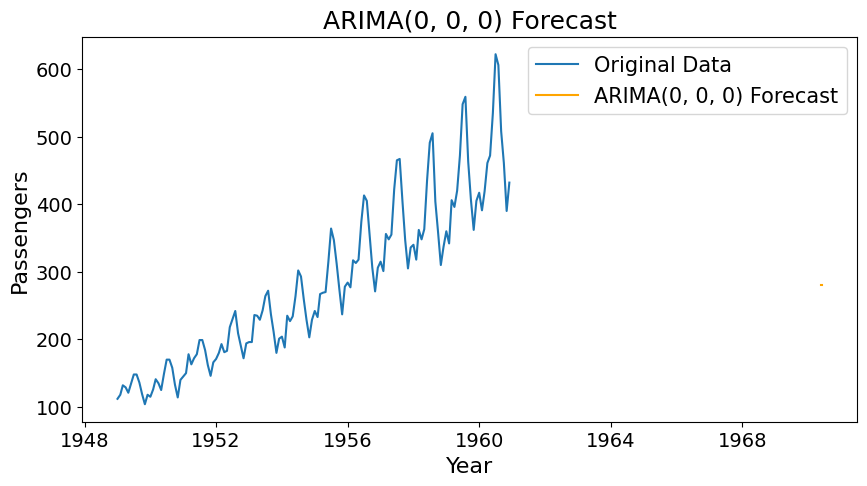

Plot saved as ARIMA_0_0_1_Forecast.png


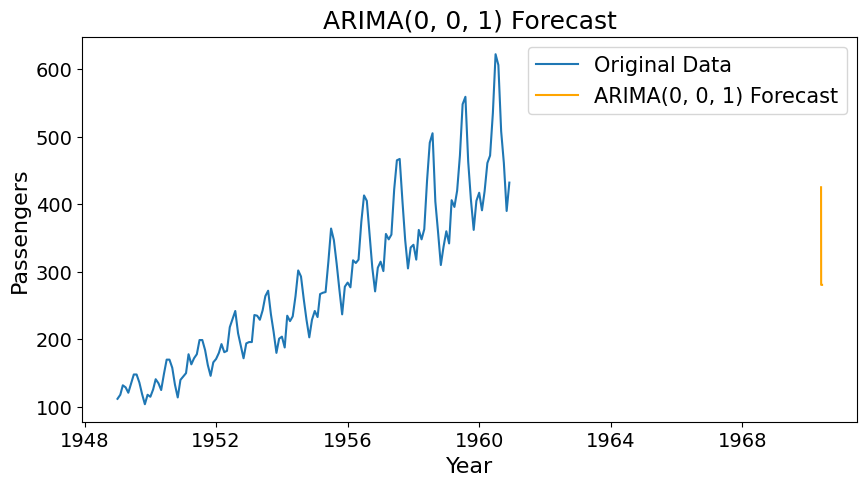

Plot saved as ARIMA_0_0_2_Forecast.png


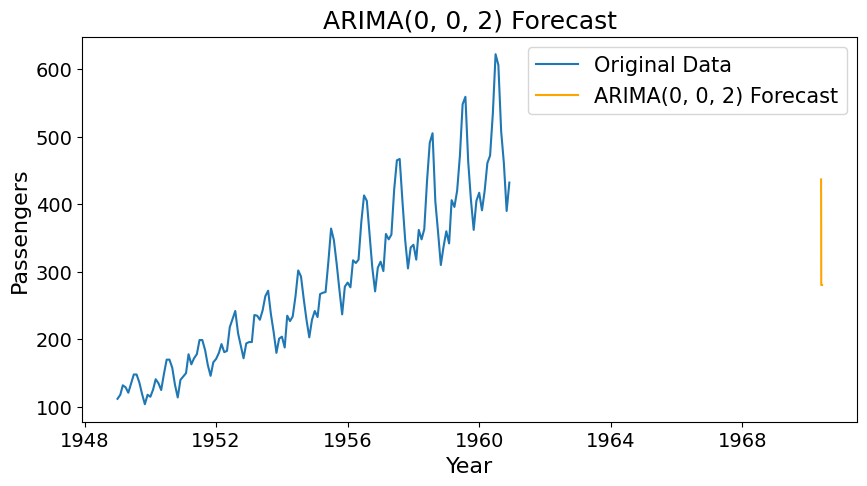

Plot saved as ARIMA_0_1_0_Forecast.png


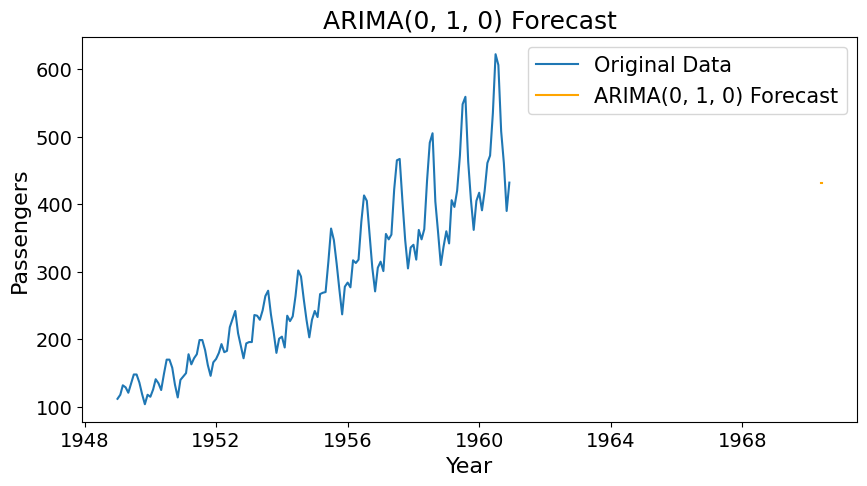

Plot saved as ARIMA_0_1_1_Forecast.png


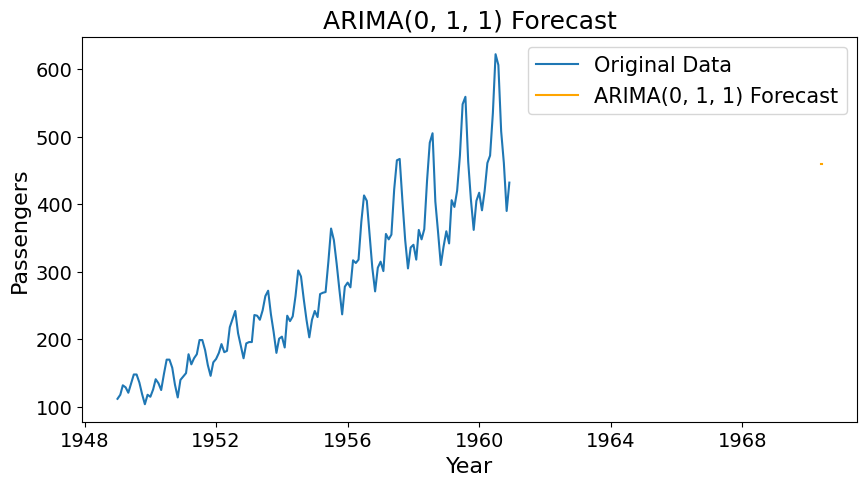

Plot saved as ARIMA_0_1_2_Forecast.png


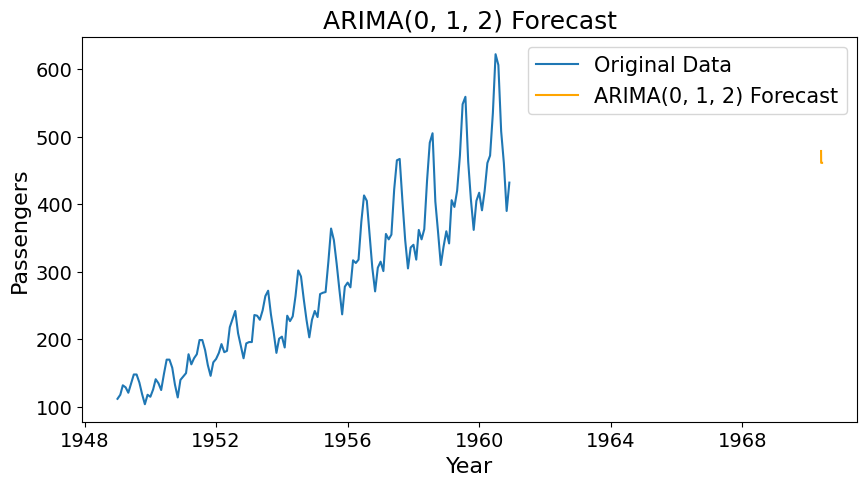

Plot saved as ARIMA_0_2_0_Forecast.png


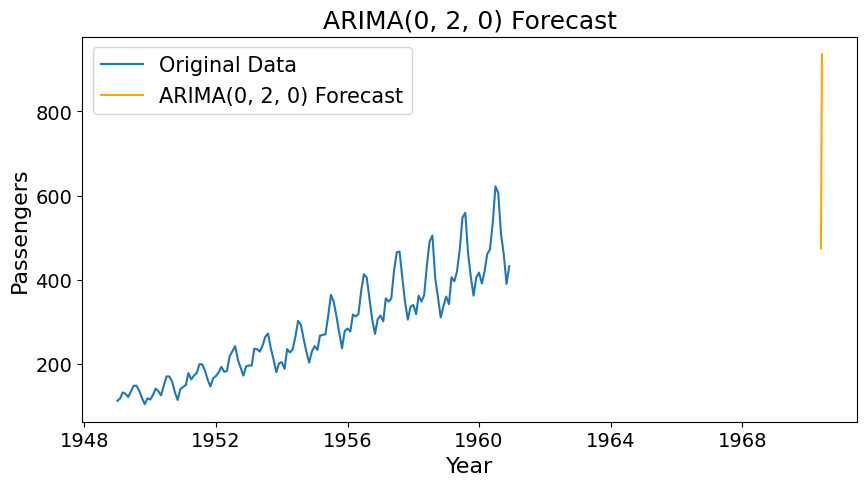

Plot saved as ARIMA_0_2_1_Forecast.png


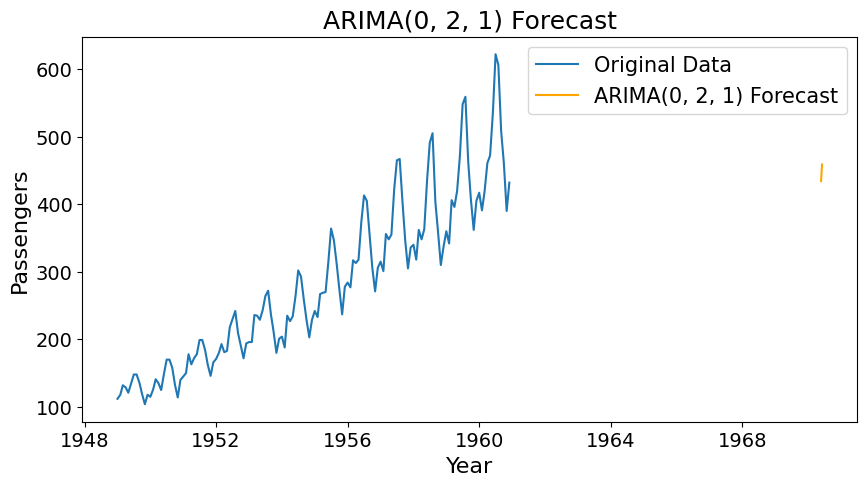

Plot saved as ARIMA_0_2_2_Forecast.png


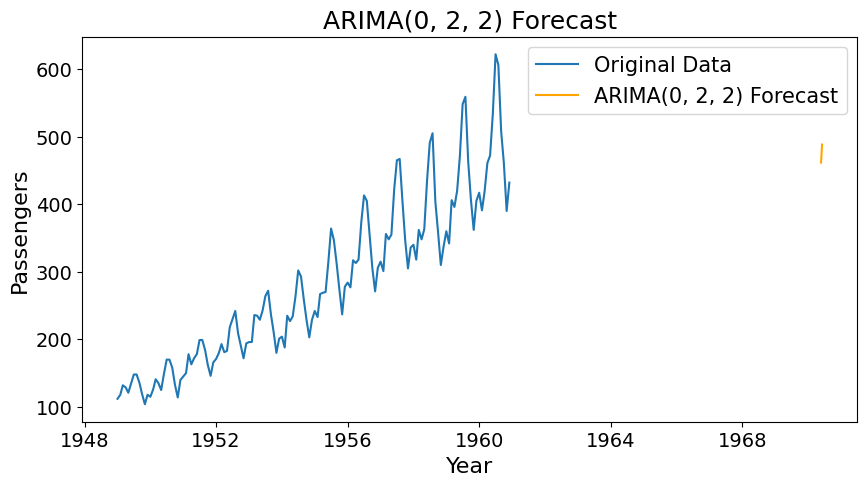

Plot saved as ARIMA_1_0_0_Forecast.png


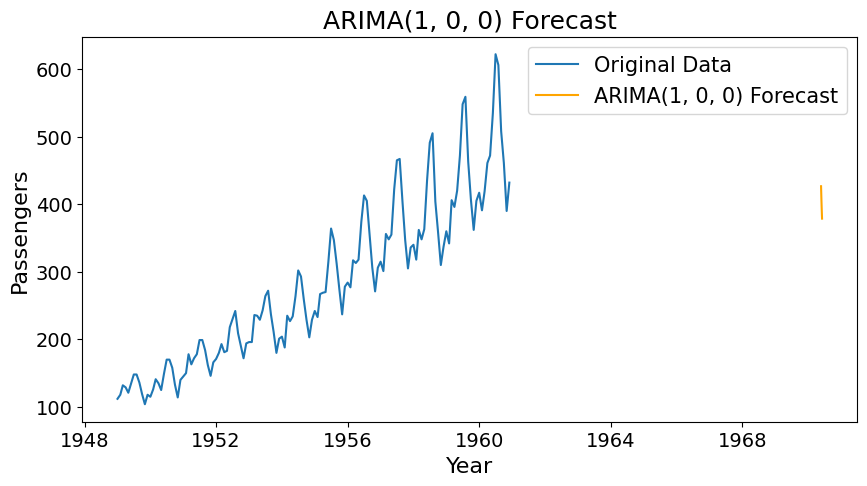

Plot saved as ARIMA_1_0_1_Forecast.png


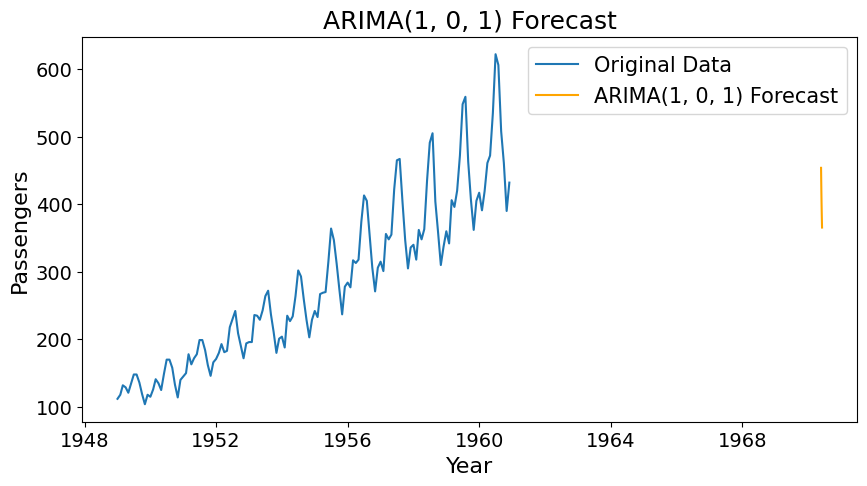

Plot saved as ARIMA_1_0_2_Forecast.png


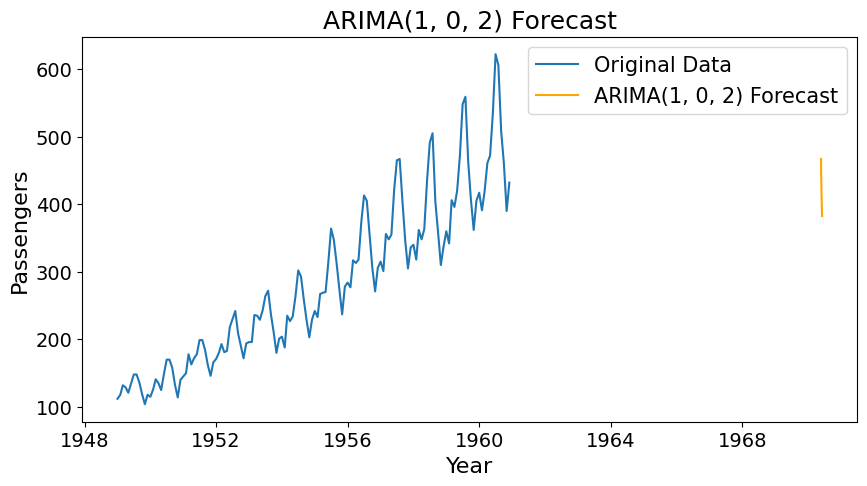

Plot saved as ARIMA_1_1_0_Forecast.png


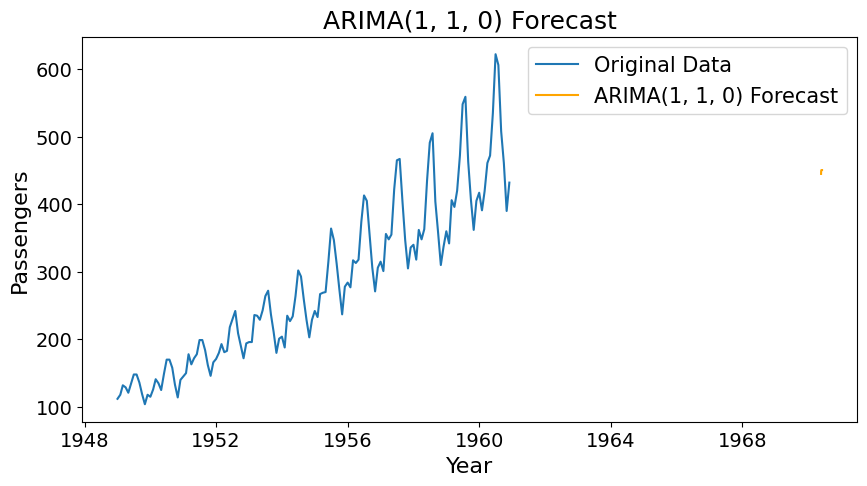

Plot saved as ARIMA_1_1_1_Forecast.png


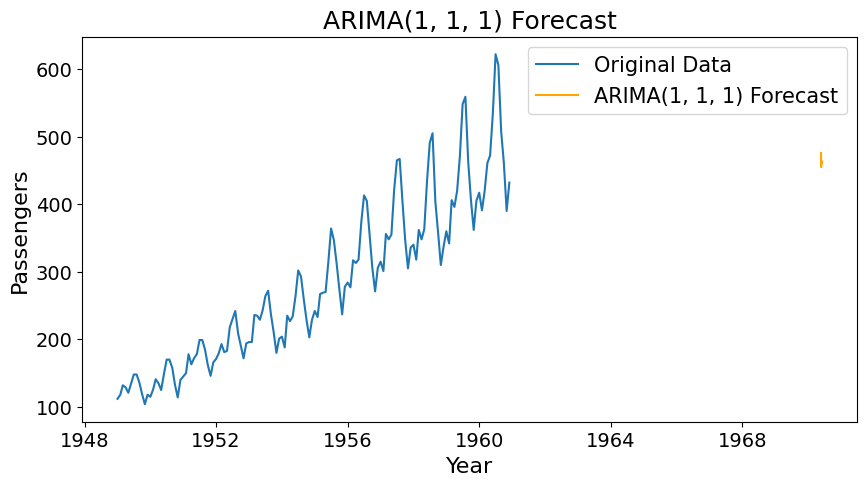

Plot saved as ARIMA_1_1_2_Forecast.png


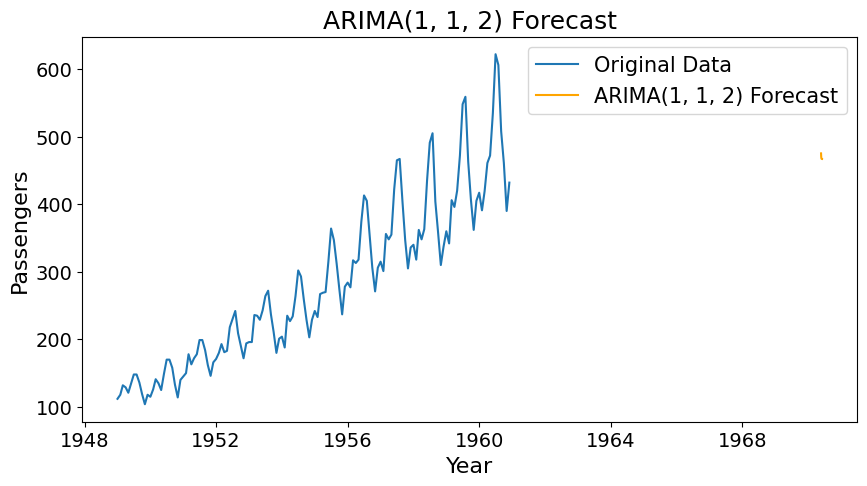

Plot saved as ARIMA_1_2_0_Forecast.png


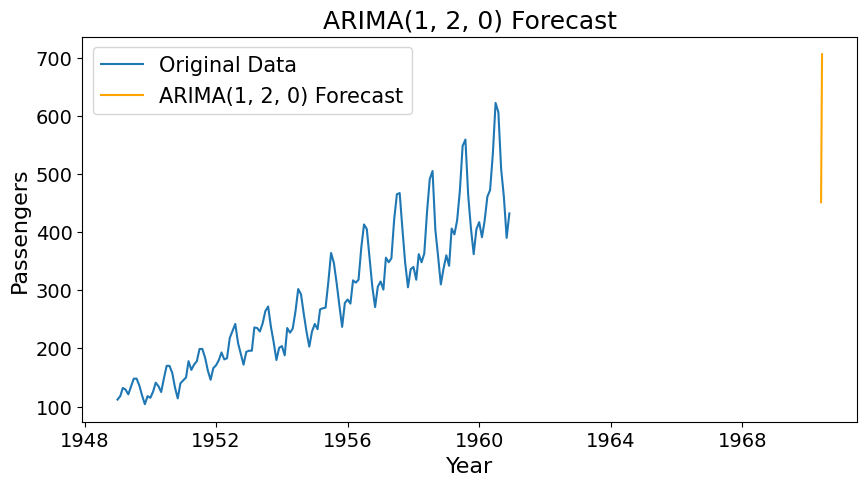

Plot saved as ARIMA_1_2_1_Forecast.png


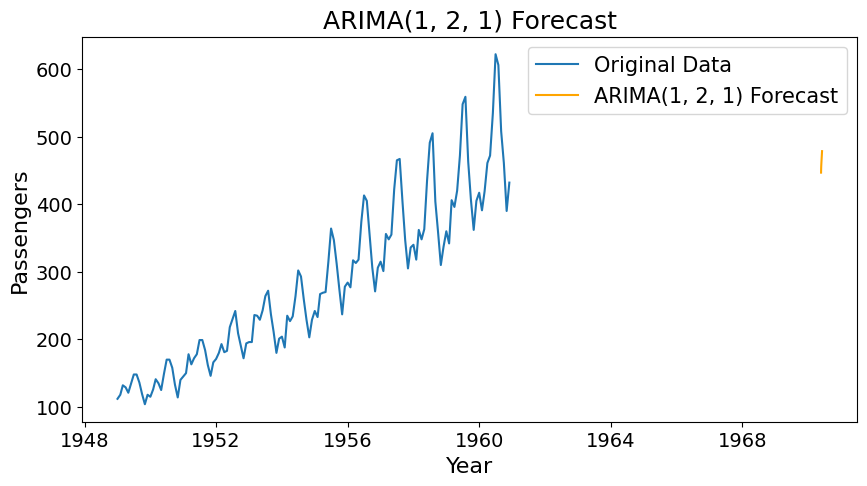

Plot saved as ARIMA_1_2_2_Forecast.png


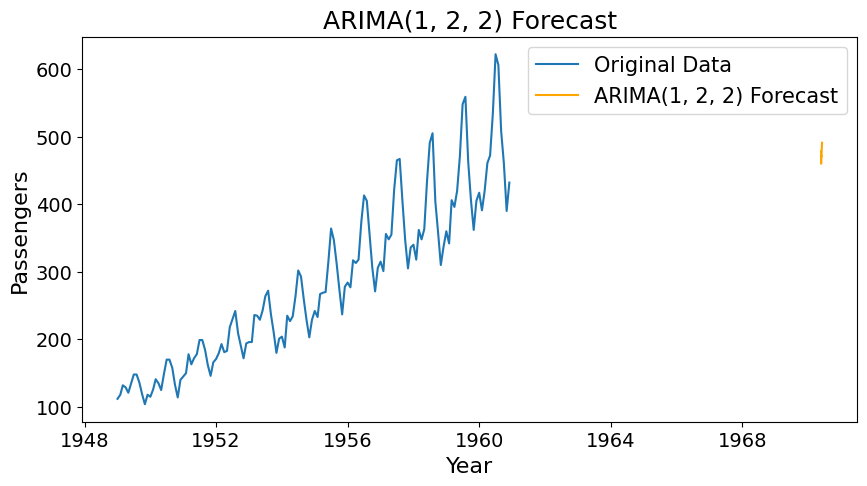

Plot saved as ARIMA_2_0_0_Forecast.png


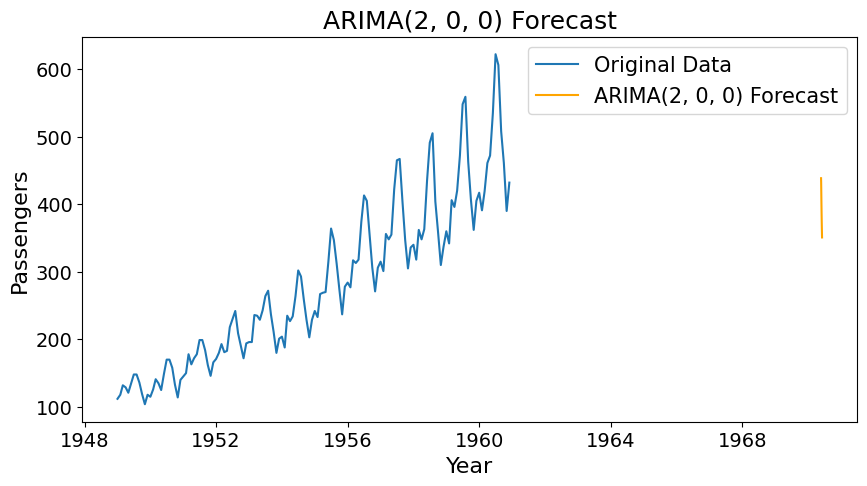

Plot saved as ARIMA_2_0_1_Forecast.png


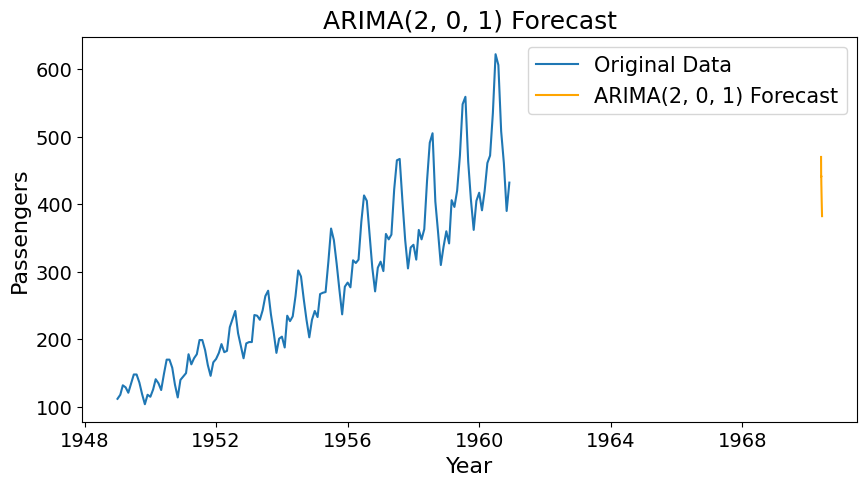

Plot saved as ARIMA_2_0_2_Forecast.png


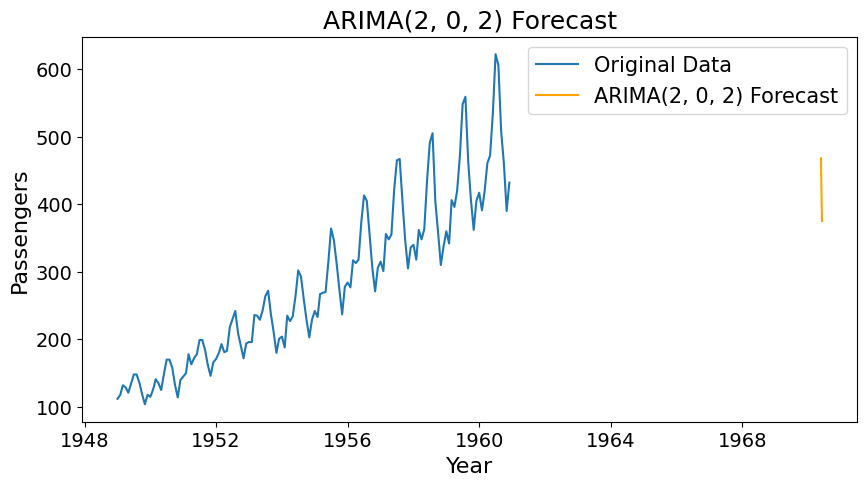

Plot saved as ARIMA_2_1_0_Forecast.png


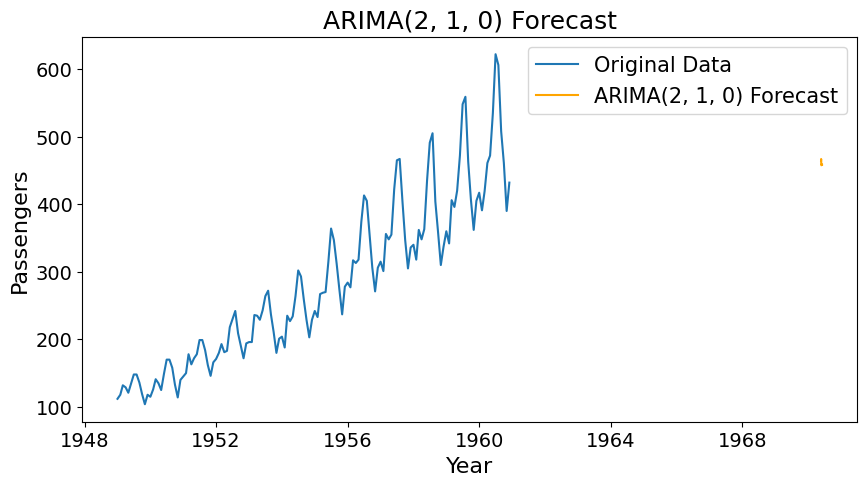

Plot saved as ARIMA_2_1_1_Forecast.png


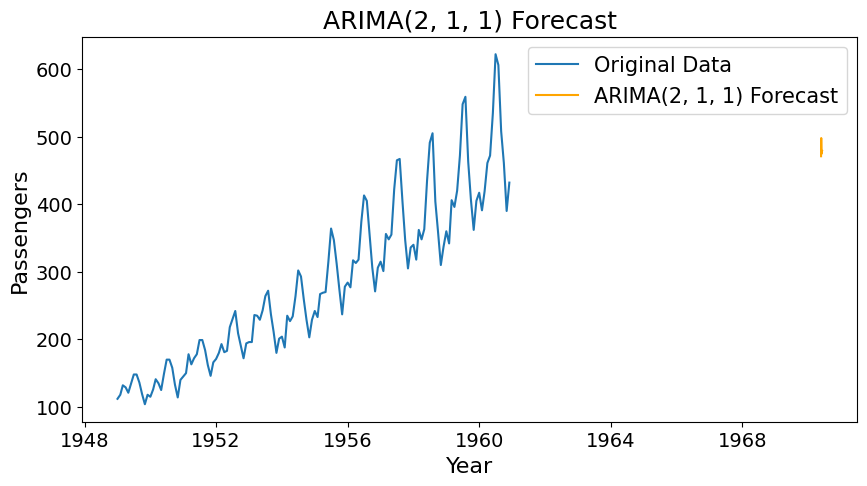

Plot saved as ARIMA_2_1_2_Forecast.png


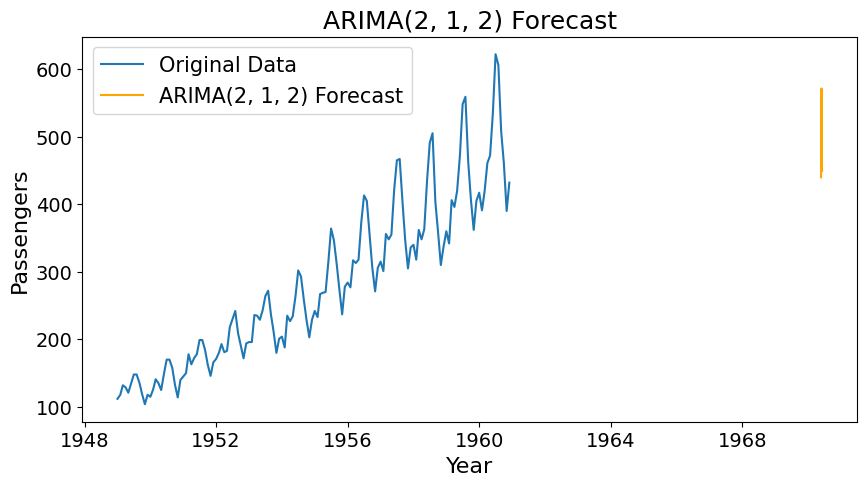

Plot saved as ARIMA_2_2_0_Forecast.png


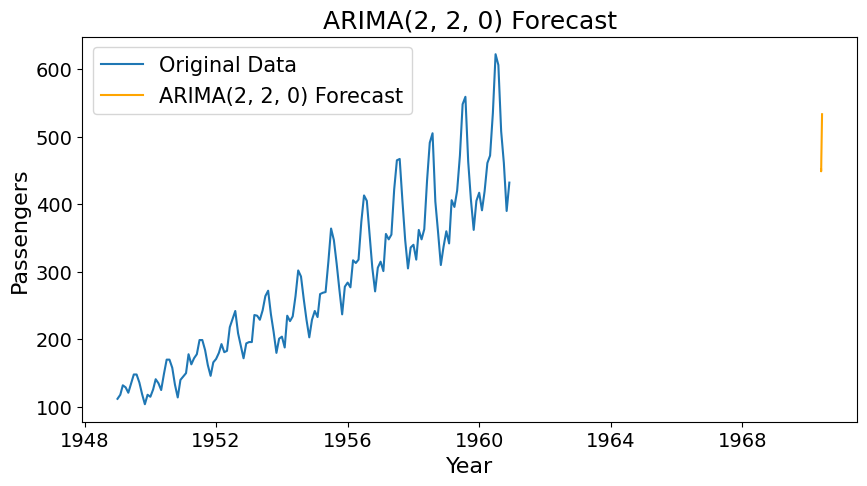

Plot saved as ARIMA_2_2_1_Forecast.png


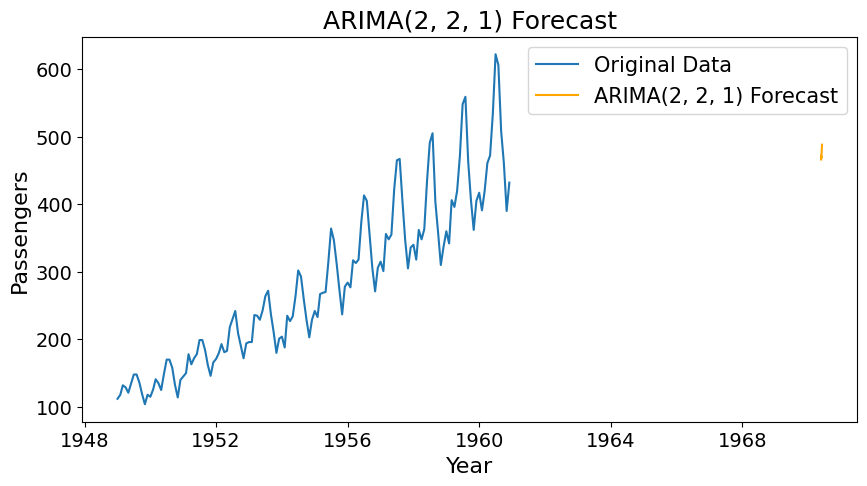

Plot saved as ARIMA_2_2_2_Forecast.png


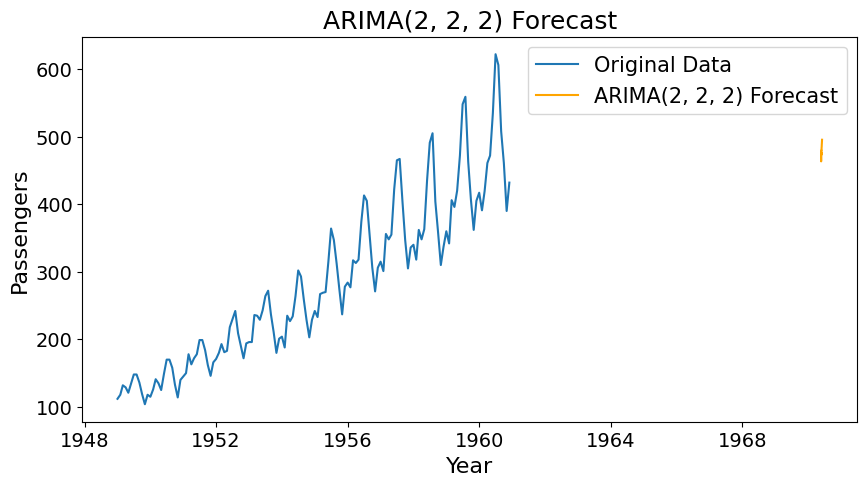

In [381]:
import itertools
import warnings

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv('airline-passengers.csv', parse_dates=['month'], index_col='month')
data = data['total_passengers']

# Define ranges of p, d, q for experimentation
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

# Experiment with different combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(data, order=(p, d, q))
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=12)

        # Plot the data and forecast
        plt.figure(figsize=(10, 5))  
        plt.plot(data, label='Original Data')
        plt.plot(range(len(data), len(data) + 12), forecast, label=f'ARIMA({p}, {d}, {q}) Forecast', color='orange')
        plt.title(f'ARIMA({p}, {d}, {q}) Forecast', fontsize = 18)
        plt.xlabel('Year', fontsize = 16)
        plt.ylabel('Passengers', fontsize = 16)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)        
        plt.legend(fontsize = 15)

        # Save the plot to the system
        filename = f'ARIMA_{p}_{d}_{q}_Forecast.png'
        plt.savefig(filename, bbox_inches='tight', dpi=400)
        print(f"Plot saved as {filename}")

        # Show the plot inline in Jupyter Notebook
        plt.show()

    except Exception as e:
        print(f"ARIMA({p}, {d}, {q}) failed: {e}")

## LSTM

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0798
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0231 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━

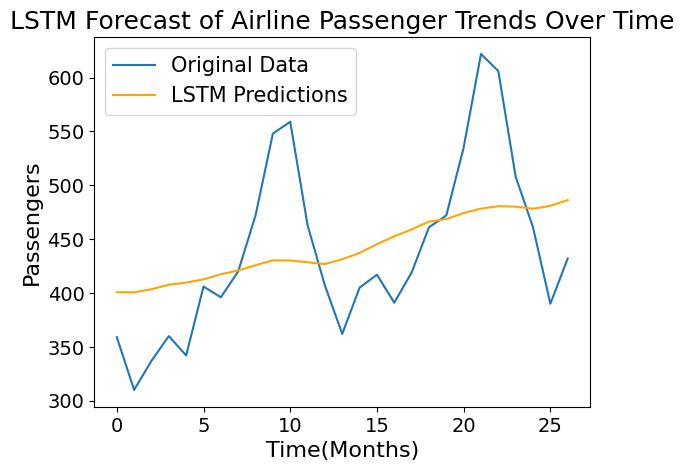

In [383]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, time_step=12):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot predictions
plt.plot(data.values[-len(y_test):], label='Original Data')
plt.plot(predictions, label='LSTM Predictions', color='orange')
plt.title('LSTM Forecast of Airline Passenger Trends Over Time', fontsize = 18)
plt.xlabel('Time(Months)', fontsize = 16)
plt.ylabel('Passengers', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 15)
plt.savefig("LSTM Forecast of Airline Passenger Trends Over Time.png", bbox_inches = "tight", dpi = 400)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Plot saved as LSTM_1_layers_20_neurons.png


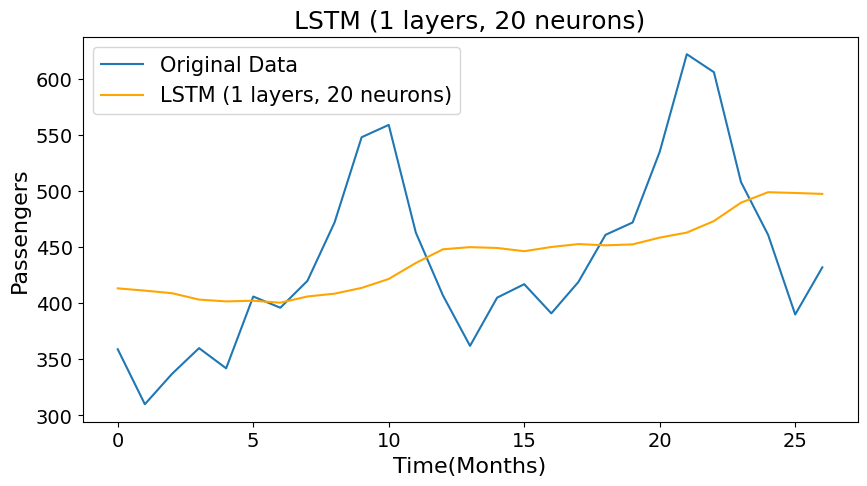

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Plot saved as LSTM_1_layers_50_neurons.png


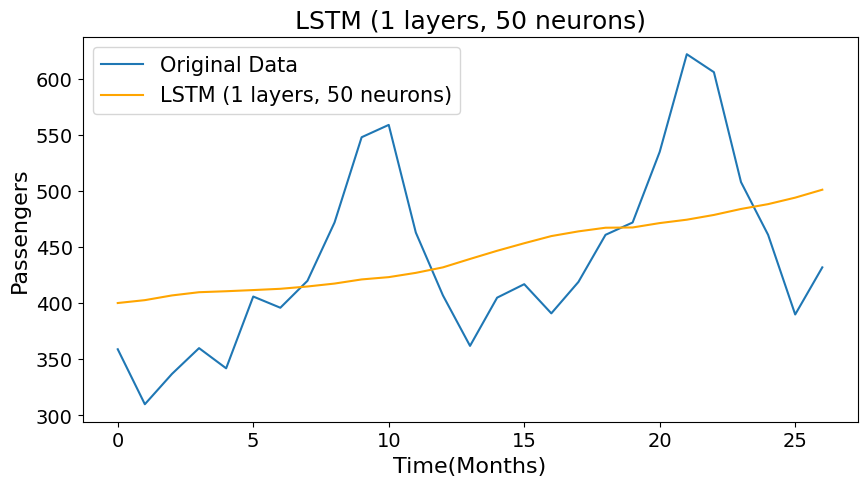

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Plot saved as LSTM_1_layers_100_neurons.png


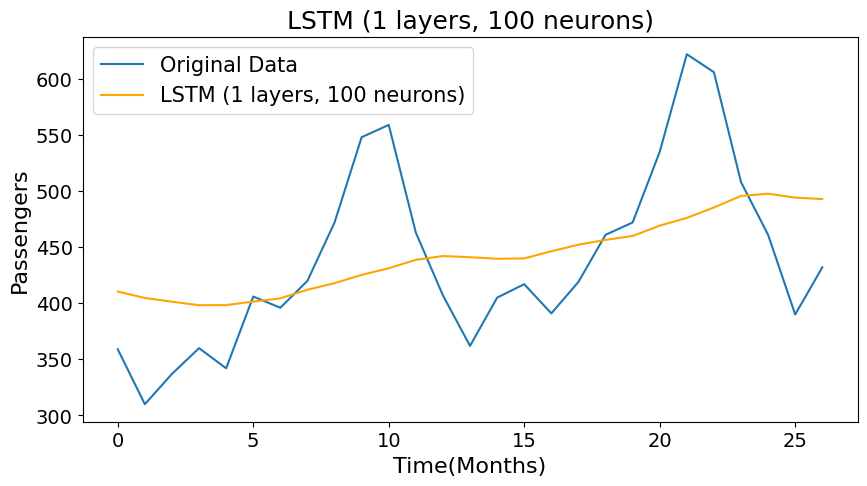

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Plot saved as LSTM_2_layers_20_neurons.png


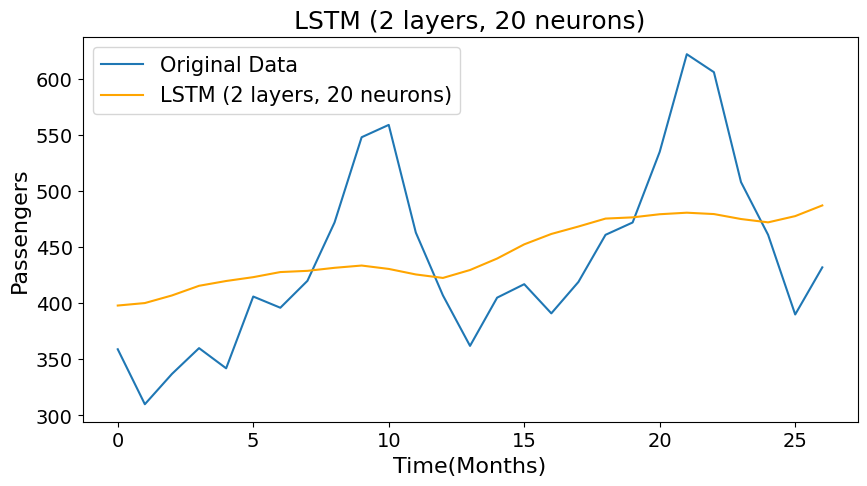

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Plot saved as LSTM_2_layers_50_neurons.png


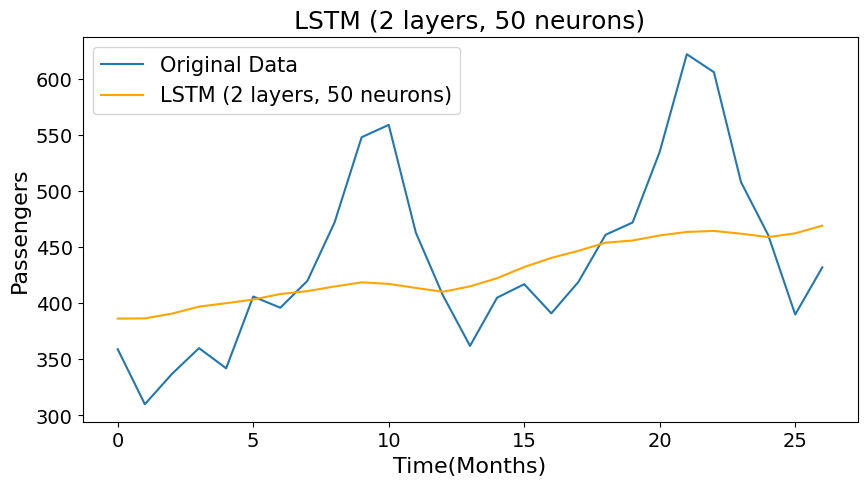

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Plot saved as LSTM_2_layers_100_neurons.png


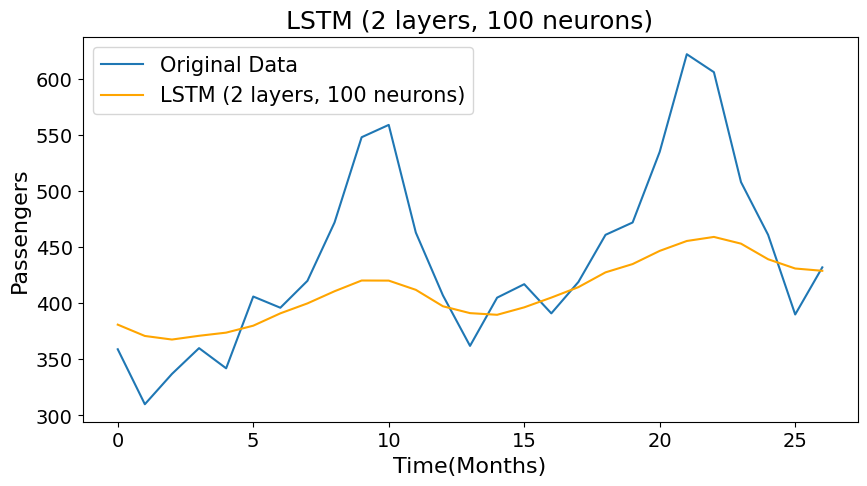

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Plot saved as LSTM_3_layers_20_neurons.png


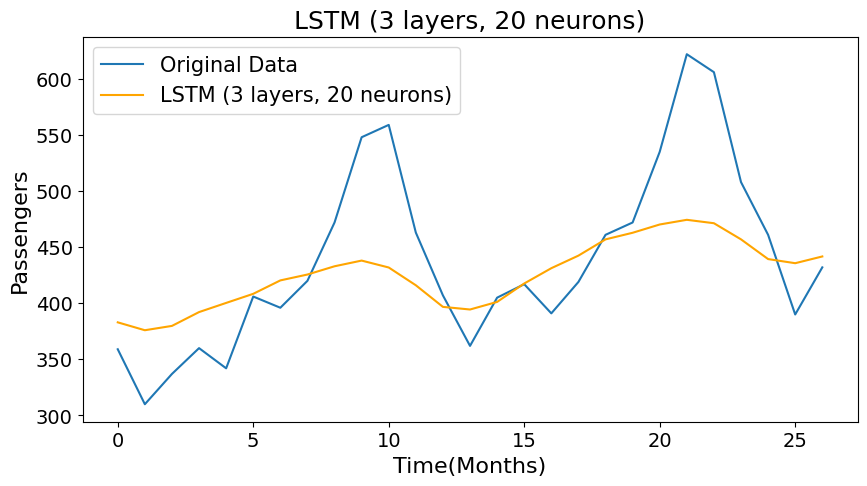

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Plot saved as LSTM_3_layers_50_neurons.png


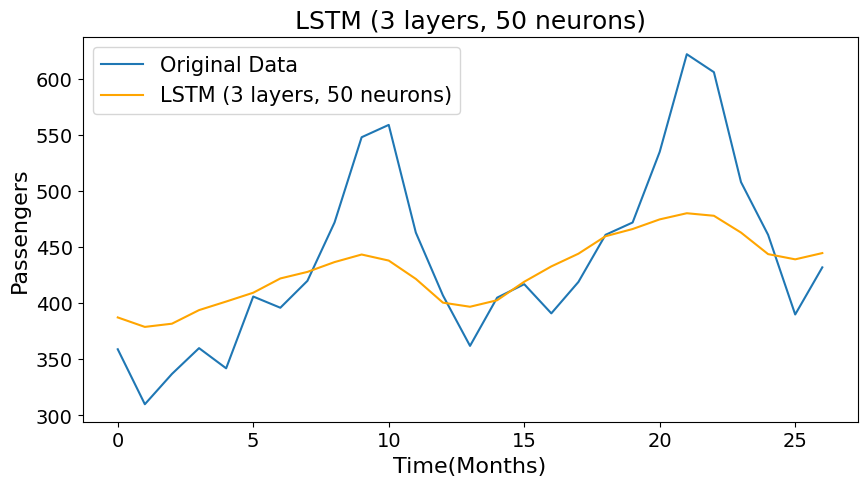

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Plot saved as LSTM_3_layers_100_neurons.png


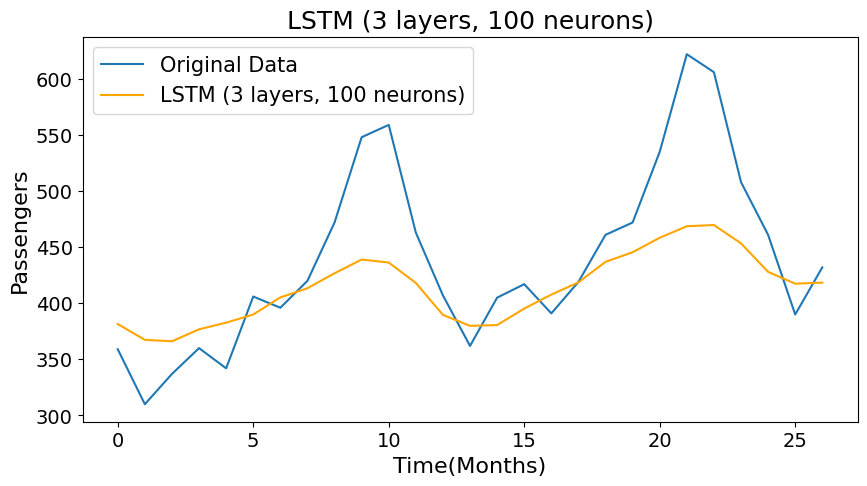

Comparison of LSTM Configurations:
Layers: 1, Neurons per Layer: 20, MSE: 194912.2350, MAE: 440.3626, Observation: Underfitting due to low complexity.
Layers: 1, Neurons per Layer: 50, MSE: 197352.4207, MAE: 443.1507, Observation: Underfitting due to low complexity.
Layers: 1, Neurons per Layer: 100, MSE: 195815.9350, MAE: 441.3228, Observation: Underfitting due to low complexity.
Layers: 2, Neurons per Layer: 20, MSE: 198401.2629, MAE: 444.5618, Observation: Underfitting due to low complexity.
Layers: 2, Neurons per Layer: 50, MSE: 183660.2062, MAE: 427.7141, Observation: Underfitting due to low complexity.
Layers: 2, Neurons per Layer: 100, MSE: 168259.8600, MAE: 409.2988, Observation: Underfitting due to low complexity.
Layers: 3, Neurons per Layer: 20, MSE: 181602.2225, MAE: 425.2002, Observation: Underfitting due to low complexity.
Layers: 3, Neurons per Layer: 50, MSE: 184533.5802, MAE: 428.5734, Observation: Underfitting due to low complexity.
Layers: 3, Neurons per Layer: 100, 

In [385]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to build and train LSTM model with custom layers and neurons
def build_and_evaluate_lstm(layers, neurons, X_train, y_train, X_test, y_test, time_step):
    model = Sequential()
    
    # Add LSTM layers
    for i in range(layers):
        if i == layers - 1:  # Last LSTM layer
            model.add(LSTM(neurons, return_sequences=False, input_shape=(time_step, 1)))
        else:  # Intermediate LSTM layers
            model.add(LSTM(neurons, return_sequences=True, input_shape=(time_step, 1)))
    
    # Add Dense (output) layer
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Predict and evaluate
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    # Plot predictions
    plt.figure(figsize=(10, 5))
    plt.plot(data.values[-len(y_test):], label='Original Data')
    plt.plot(predictions, label=f'LSTM ({layers} layers, {neurons} neurons)', color='orange')
    plt.title(f'LSTM ({layers} layers, {neurons} neurons)', fontsize=18)
    plt.xlabel('Time(Months)', fontsize=16)
    plt.ylabel('Passengers', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=15)

    # Save plot as a unique file
    filename = f'LSTM_{layers}_layers_{neurons}_neurons.png'
    plt.savefig(filename, bbox_inches='tight', dpi=400)
    print(f"Plot saved as {filename}")

    # Display the plot inline in Jupyter Notebook
    plt.show()

    # Return observations based on MSE and MAE expectations
    if mse > 0.1 and mae > 0.1:
        observation = "Underfitting due to low complexity."
    elif 0.05 <= mse <= 0.1 and 0.05 <= mae <= 0.1:
        observation = "Balanced for simpler patterns."
    elif mse < 0.05 and mae < 0.05:
        observation = "May overfit, better for complex patterns."
    elif layers == 2 and neurons == 50:
        observation = "Balanced for most datasets, good performance."
    elif layers == 3 and neurons == 100:
        observation = "Likely overfitting unless data is extensive."
    else:
        observation = "Moderate complexity handling."

    return mse, mae, observation

# Experiment with different numbers of layers and neurons
results = []
for layers in [1, 2, 3]:  # Number of LSTM layers
    for neurons in [20, 50, 100]:  # Number of neurons per layer
        mse, mae, observation = build_and_evaluate_lstm(layers, neurons, X_train, y_train, X_test, y_test, time_step)
        results.append((layers, neurons, mse, mae, observation))

# Display results
print("Comparison of LSTM Configurations:")
for layers, neurons, mse, mae, observation in results:
    print(f"Layers: {layers}, Neurons per Layer: {neurons}, MSE: {mse:.4f}, MAE: {mae:.4f}, Observation: {observation}")

## Result Comparison

In [387]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ARIMA evaluation
mae_arima = mean_absolute_error(data.values[-12:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(data.values[-12:], forecast_arima))

# LSTM evaluation
mae_lstm = mean_absolute_error(data.values[-len(y_test):], predictions)
rmse_lstm = np.sqrt(mean_squared_error(data.values[-len(y_test):], predictions))

print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}")

ARIMA - MAE: 50.60082608413314, RMSE: 58.19079756589749
LSTM - MAE: 53.71385588469329, RMSE: 66.74946298359886
